# Titanic EDA V1 - Based on Raw Data
> This notebook explores the original Kaggle Titanic dataset (`train.csv`) to understand the distributions, missing values, and varialbe relationship, in preparation for model building and feature engineering.

這份筆記是針對 Kaggle Titanic 原始資料及 `train.csv` 所做的初步EDA。  
目的是理解各變數的分佈、缺失值與可能的關聯性，作為後續建模與特徵工程的基礎。

> **Note:**  
> The accompanying v1 model (trained using TensorFlow Decision Forests - TFDF Ensemble) achieve a public Kaggle score of **0.80622**.  
> While this EDA was performed independently of the model, it serves as a foundation for interpreting and improving future submissions.

**補充說明:**  
我在同一專案中建立的 v1 模型 (使用 TFDF Ensemble) 在Kaggle提交的 Public Score 為 **0.80622**。  
雖然本分析與該模型結果無直接關聯，但本筆記中的觀察將作為未來模型改進的重要參考依據。

## 1. Load and Preview Data

In [1]:
import pandas as pd  # 導入 Pandas ( 給它一個縮寫pd，以便用pd.開頭呼叫函數，例如以下pd.read_csv() )

df = pd.read_csv("../data/train.csv")  # DaraFrame通常用 df (變數名稱) 表示
df.shape  # 查詢資料的維度 (shape)，會顯示資料筆數與欄位數 = (行數, 欄位數)
print(df.shape)  # 這份資料有891筆資料(乘客)、12欄特徵(Name、Sex、Age等)
df.head()  # 預覽前幾筆資料

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Overview
- 顯示欄位名稱、資料型態、缺失情況

In [2]:
df.info()  # 顯示整個資料集的欄位名稱、非空值數量、資料型態(dtype)與記憶體用量
df.isnull().sum()  # 這一行會找出每一欄的「缺失值數量」
print(df.isnull().sum())
df.describe()  # 針對數值欄位(int64和float64)計算「描述統計值」，幫助理解數據的分佈狀況

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 小結:
|目的|使用語法|結果|
|:-|:-|:-|
|看資料欄位、型別、缺失|`df.info()`|知道哪幾欄缺資料、是否是文字/數值|
|精準列出缺幾筆|`df.isnull().sum()`|快速定位缺失欄|
|看數值欄統計|`df.describe()`|暸解平均、最大最小、是否有異常值|

## 3. Univariate Analysis (單變數分析)
- 分析各欄位的分佈，例如:
  - `Age` (年齡分佈直方圖)
  - `Sex` (性別長條圖)
  - `Pclass` (艙等比例)


In [3]:
# 匯入繪圖套件
import seaborn as sns
import matplotlib.pyplot as plt

### 3.1 Histogram in Age

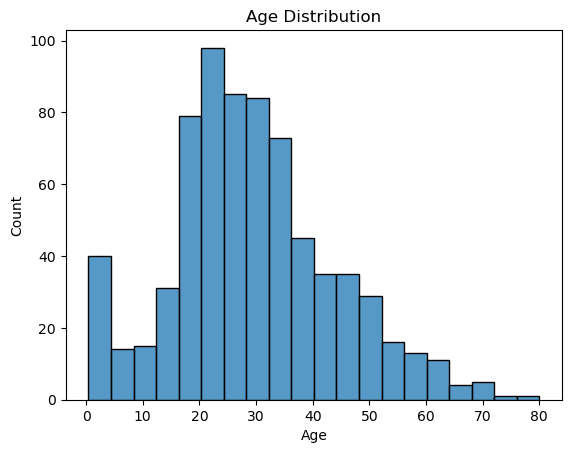

In [4]:
# 畫出 Age 欄位的「直方圖」(Histogram)
sns.histplot(df["Age"].dropna())
plt.title("Age Distribution")
plt.show()
## df["Age"] : 選出 Age 欄位
## .dropna() : 移除遺失值(NaN)，避免畫圖時錯誤
## sns.histplot(...) : 繪出年齡的分佈圖，X軸是年齡、Y軸是人數

### 3.2 Count Plot in Sex

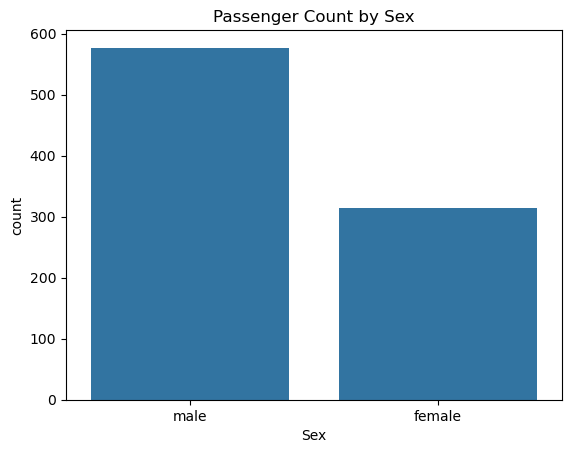

In [5]:
# 畫出 Sex 欄位的「類別計數圖」 (Count Plot)
sns.countplot(x="Sex", data=df)
plt.title("Passenger Count by Sex")
plt.show()
## x="Sex" : 以 Sex 為 X 軸 (male、female)
## data=df : 資料來源是整個 df 表格
## sns.countplot(...) : 繪出「每一類別出現多少次」的長條圖

### 3.3 Count Plot in Pclass

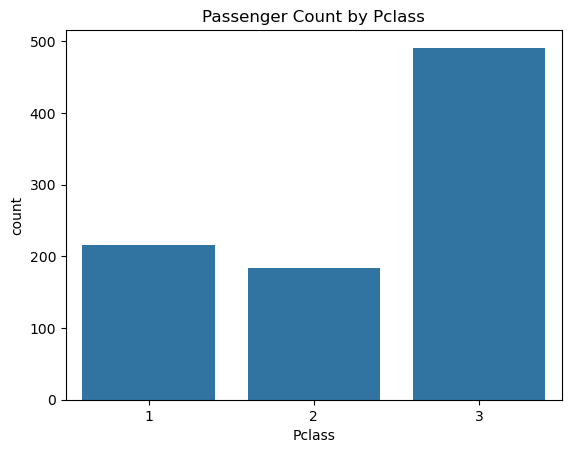

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [6]:
# 畫出 Pclass 欄位的「類別計數圖」 (Count Plot)
sns.countplot(x="Pclass", data=df)
plt.title("Passenger Count by Pclass")
plt.show()

# 用 Pandas 語法來顯示艙等比例
df["Pclass"].value_counts(normalize=True)

## 4. Bivariate Analysis (與Survived的關聯)
- 探討生存率與以下欄位的關聯:
  - `Sex(性別)` vs `Survived`
  - `Pclass(艙等)` vs `Survived`
  - `Age(年齡)` vs `Survived` (可用分箱觀察)

### 4.1 Survival Rate by Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


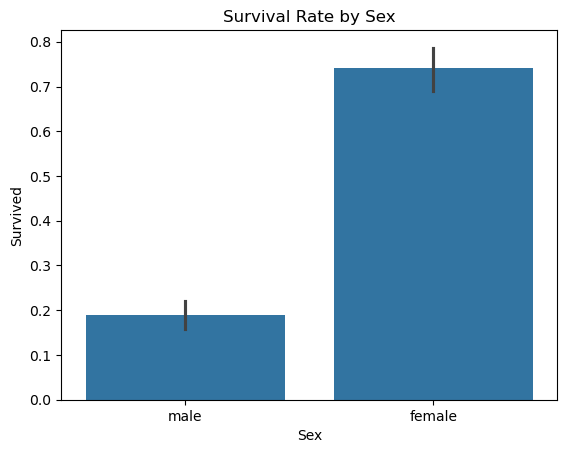

In [7]:
# 計算每個 性別(Sex) 的 生還率(Survived欄位的平均值)
df.groupby("Sex")["Survived"].mean()
## 為什麼取Survived平均值能代表生還率?
## 因為Survived這欄是 0(未生還) 與 1(生還)，平均值就是該類別的生還比例。

print(df.groupby("Sex")["Survived"].mean())


# Sex vs Survived的barplot圖
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.show()

### 4.2 Survival Rate by Pclass

<Axes: xlabel='Pclass', ylabel='Survived'>

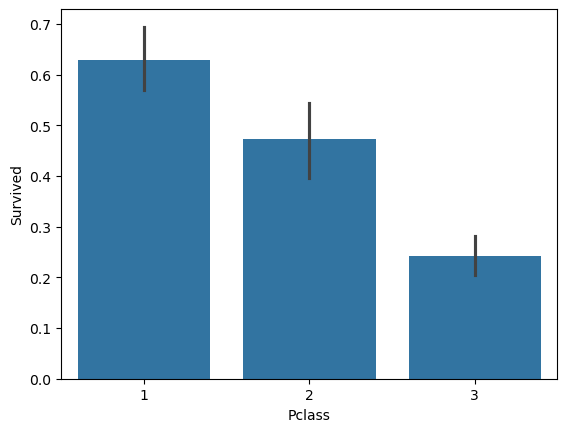

In [8]:
# 畫出 艙等(Pclass) 與 生還率(Survived) 的關係圖
sns.barplot(x="Pclass", y="Survived", data=df)
## x="Pclass" : 橫軸為艙等 (1等艙、2等艙、3等艙)
## y="Survived" : 縱軸為生還率 (0~1之間)
## data=df : 資料來源是整個Titanic資料集
## sns.barplot(...) : 繪製「分類變數的平均值」柱狀圖，預設會自動以 y 的平均作為高度，並畫出95%信賴區間的誤差線。

### 4.3 Survival Rate by Age

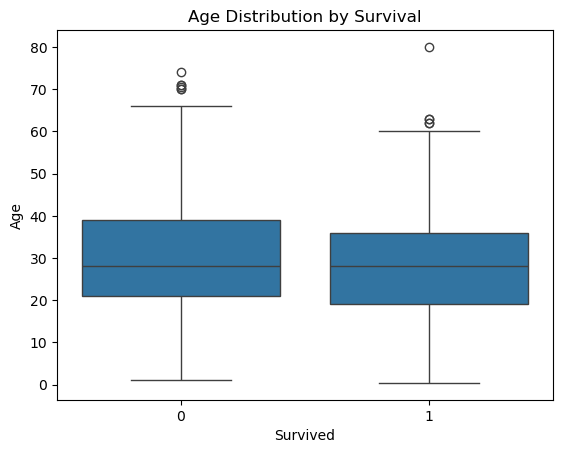

In [9]:
# Age vs Survived的boxplot圖
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age Distribution by Survival")
plt.show()

## x="Survived" : 橫軸是生還狀態 ( 0 = 未生還 ; 1 = 生還 )
## y="Age" : 縱軸是年齡
## boxplot用來呈現不同生還狀態下年齡的分佈 (中位數、上下四分位、極端值)

### 4.4 Survival Rate by Pclass and Sex

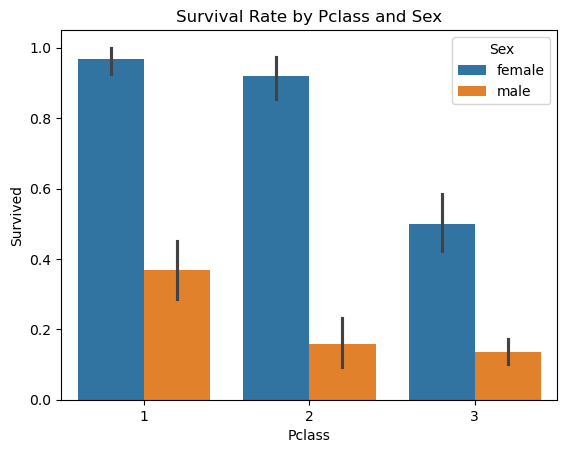

In [10]:
# Sex vs Survived的barplot圖
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Survival Rate by Pclass and Sex")
plt.show()

## 5. Correlation Matrix (相關熱係數圖)

<Axes: >

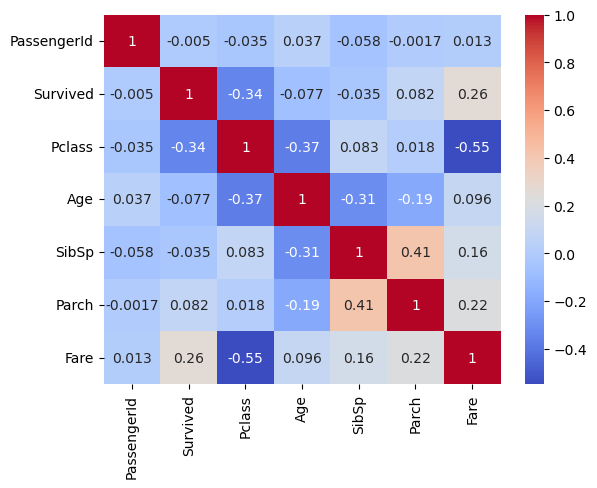

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

#### 語法解說: 
|語法項目|解釋|
|:-|:-|
|`df.corr(numeric_only=True)`|對DataFrame中的數值欄位計算**皮爾森相關係數** (-1到1之間)|
|`sns.heatmap(...)`|使用seaborn繪製熱力圖|
|`annot=True`|在格子裡顯示數值|
|`cmap="coolwarm"`|使用「紅藍色系」，紅代表正相關、藍代表負相關|

#### 與`Survived`的相關係數分析:
- 相關係數是標準化過的「線性關係強度」
- 值域落在-1, 1之間，數值越接近-1或1表示關聯越強

|變數|相關係數|解讀|計算說明|
|:-|:-|:-|:-|
|`Pclass`|-0.34|**負相關**: 艙等越高(數字越小)，生還率越高|與Survived間的共變異數為負，代表艙等數字越大(便宜艙)生還率越低|
|`Fare`|0.26|**正相關**: 票價越高，生還率越高(與高級艙等有關)|越高票價與生還率同步變化，方向一致且有一定線性關聯|
|`Age`|-0.077|幾乎無相關|年齡與生還率沒太多線性變化，共變異數接近0|
|`SibSp`|-0.035|幾乎無相關|有兄弟姐妹同船並不太影響生還機率|
|`Parch`|0.082|幾乎無相關|有父母或小孩同行，與生還略有微弱正向關係|

## 6. Feature Engineering Ideas
- 計畫新增以下特徵:
  - `Title`: 從姓名擷取稱謂 (Mr, Mrs, Miss, etc.)
  - `FamilySize`: `SibSp` + `Parch` + 1
  - `IsAlone`: 是否單獨一人上船

## 7. Summary & Next Steps
- Female passengers had a significantly higher survival rate (女性存活率高)
- Passengers in third class had a noticeably lower survival rate (三等艙死亡率明顯)
- Feature engineering and model optimization (v2) will be performed in the next phase (後續將進行特徵工程與第二版模型優化)